# "Wine Quality."

## Part 1: Import, Load Data.

* ### Import libraries

In [3]:
# import standard libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
%matplotlib inline
sns.set()

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

* ### Read data from ‘.csv’ file

In [4]:
# read data from '.csv' file
dataset = pd.read_csv('winequality.csv') 

## Part 2: Exploratory Data Analysis.

* ### Info

In [5]:
# print the full summary of the dataset  
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.2 KB


Dataset consists of 4898 rows and 12 columns; 

has 2 datatypes: float64(11), int64(1);

has no missing values.

* ### Head

In [6]:
# preview of the first 5 lines of the loaded data 
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


* ### Describe

In [7]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Предположим, вам дали такой датасет и поставили конктетный вопрос: классифицируйте какие вина хорошие, а какие нет?
У вас нет атрибута "Y" и ответа. Но есть хороший вспомогательный атрибут "quality" из которого мы сможем создать наш атрибут "Y" с ответом для обучения модели.
Атрибут "quality" имеет значения от 3 до 9, где 3 это "Not Good", а 9 это "Good" качество вина. Чем выше число, тем лучше вино.

* ### Encoding 'quality' attribute

In [8]:
# lambda function; wine quality from 3-6 == 0, from 7-9 == 1.
dataset['quality'] = dataset.quality.apply(lambda q: 0 if q <= 6 else 1)

In [9]:
# preview of the first 5 lines of the loaded data 
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


* ### 'quality' attribute value counts and visualisation

In [10]:
print('Not good wine', round(dataset['quality'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Good wine', round(dataset['quality'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

dataset['quality'].value_counts()

Not good wine 78.36 % of the dataset
Good wine 21.64 % of the dataset


0    3838
1    1060
Name: quality, dtype: int64

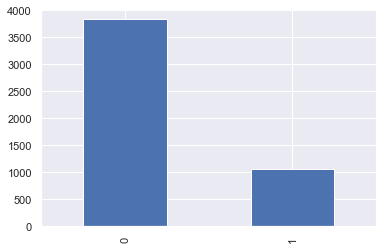

In [11]:
# visualisation plot
dataset['quality'].value_counts().plot(x = dataset['quality'], kind='bar')

There are 78.36 % of 'Not Good' quality wines and only 21.64 % of 'Good' quality wines in our dataset. This means that our dataset is imbalanced.

* ### Resampling of an imbalanced dataset

In [12]:
# class count
#count_class_0, count_class_1 = dataset.quality.value_counts()

# divide by class
#class_0 = dataset[dataset['quality'] == 0]
#class_1 = dataset[dataset['quality'] == 1]

* ### Random under-sampling of an imbalanced dataset

In [13]:
#class_0_under = class_0.sample(count_class_1)
#dataset_under = pd.concat([class_0_under, class_1], axis=0)

#print('Random under-sampling:')
#print(dataset_under.quality.value_counts())

#dataset_under.quality.value_counts().plot(kind='bar', title='Count (target)');

* ### Random over-sampling of an imbalanced dataset

In [14]:
#class_1_over = class_1.sample(count_class_0, replace=True)
#dataset_over = pd.concat([class_0, class_1_over], axis=0)

#print('Random over-sampling:')
#print(dataset_over.quality.value_counts())

#dataset_over.quality.value_counts().plot(kind='bar', title='Count (target)');

* ### Initialisation of target

In [15]:
# initialisation of target
target = dataset['quality']

# for under-sampling dataset
#target_under = dataset_under['quality']

# for over-sampling dataset
#target_over = dataset_over['quality'] 

* ### Drop column 'quality'

In [16]:
dataset = dataset.drop(columns=['quality'])

# for under-sampling dataset
#dataset_under = dataset_under.drop(columns=['quality'])

# for over-sampling dataset
#dataset_over = dataset_over.drop(columns=['quality'])